# 2nd SK-learn model

##  Data



## Load packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  

sns.set_theme()

## Import Dataset

In [2]:
raw_dataset = pd.read_csv("car_prices.csv", on_bad_lines="skip")

In [3]:
df = raw_dataset.copy()

## Data inspection

In [4]:
df.head(2)

year make    model trim body transmission                vin state  \
0  2015  Kia  Sorento   LX  SUV    automatic  5xyktca69fg566472    ca   
1  2015  Kia  Sorento   LX  SUV    automatic  5xyktca69fg561319    ca   

   condition  odometer  color interior                   seller    mmr  \
0        5.0   16639.0  white    black  kia motors america, inc  20500   
1        5.0    9393.0  white    beige  kia motors america, inc  20800   

   sellingprice                                 saledate  
0         21500  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1         21500  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


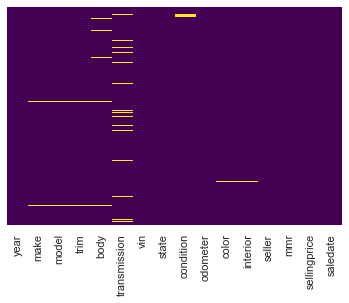

In [6]:
# show missing values (missing values - if present - will be displayed in yellow)
sns.heatmap(df.isnull(), 
            yticklabels=False,
            cbar=False, 
            cmap='viridis');

In [7]:
print(df.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


## Data transformation

In [8]:
# drop column with too many missing values
df = df.drop(['transmission'], axis=1)

# drop remaining row with one missing value
df = df.dropna()

In [9]:
# Drop irrelevant features
df = df.drop(['trim', 'vin', 'mmr'], axis=1)

In [10]:
print(df.isnull().sum())

year            0
make            0
model           0
body            0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
sellingprice    0
saledate        0
dtype: int64


In [11]:
# rename columns

df = df.rename(columns={
"make" : "brand",
"body" : "type",
"odometer" : "miles"} 
    )

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533660 entries, 0 to 558810
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          533660 non-null  int64  
 1   brand         533660 non-null  object 
 2   model         533660 non-null  object 
 3   type          533660 non-null  object 
 4   state         533660 non-null  object 
 5   condition     533660 non-null  float64
 6   miles         533660 non-null  float64
 7   color         533660 non-null  object 
 8   interior      533660 non-null  object 
 9   seller        533660 non-null  object 
 10  sellingprice  533660 non-null  int64  
 11  saledate      533660 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 52.9+ MB


In [13]:
# transform into lowercase

df["brand"] = df["brand"].str.lower()
df["model"] = df["model"].str.lower()
df["type"] = df["type"].str.lower()

# Categorial or numeric?

* year = categorial
* brand = categorial
* model = categorial
* type = categorial
* state = categorial
* condition = categorial
* miles = numeric
* color = categorial
* interior = categorial
* seller = categorial
* ratingprice = numeric
* sellingprice = numeric
* saledate = categorial

In [14]:
# In kategorische Variablen umwandeln:

for cat in ["year", "brand", "model", "type", "state", "condition", "color", "interior", "seller", "saledate"]:
    df[cat] = df[cat].astype("category")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533660 entries, 0 to 558810
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   year          533660 non-null  category
 1   brand         533660 non-null  category
 2   model         533660 non-null  category
 3   type          533660 non-null  category
 4   state         533660 non-null  category
 5   condition     533660 non-null  category
 6   miles         533660 non-null  float64 
 7   color         533660 non-null  category
 8   interior      533660 non-null  category
 9   seller        533660 non-null  category
 10  sellingprice  533660 non-null  int64   
 11  saledate      533660 non-null  category
dtypes: category(10), float64(1), int64(1)
memory usage: 19.6 MB


In [16]:
# summary statistics for all categorical columns
df.describe(include=['category']).transpose()

count unique                                      top     freq
year         533660     26                                     2012   100612
brand        533660     53                                     ford    91908
model        533660    768                                   altima    19159
type         533660     45                                    sedan   236445
state        533660     38                                       fl    79626
condition  533660.0   41.0                                      1.9  40404.0
color        533660     20                                    black   106600
interior     533660     17                                    black   238668
seller       533660  12739                       nissan-infiniti lt    19677
saledate     533660   3687  Tue Feb 10 2015 01:30:00 GMT-0800 (PST)     5231

## Data splitting

In [17]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_dataset

year          brand           model     type state condition  \
530723  2000          volvo             s40    sedan    fl       2.0   
309554  2012          honda            cr-v      suv    tn       3.8   
527934  2008  mercedes-benz         s-class    sedan    pa       4.0   
44135   2010          dodge   grand caravan  minivan    qc       4.4   
429520  2014         nissan      pathfinder      suv    mo       3.7   
...      ...            ...             ...      ...   ...       ...   
118707  2014           ford  e-series wagon      van    tx       3.5   
105346  2011         nissan          maxima    sedan    ca       2.3   
451157  2013       infiniti         g sedan  g sedan    nj       3.6   
401984  2008         nissan          sentra    sedan    tn       1.9   
98497   2011            bmw        3 series    coupe    ca       2.0   

           miles   color interior                                  seller  \
530723   90938.0    gray     gray             vietnam veterans of america   
309554   35209.0   white     gray                       wholesale inc # 2   
527934   70838.0       —    brown            r hollenshead auto sales inc   
44135    94913.0     red    black                         goldstar motors   
429520   39827.0  silver    black                        avis corporation   
...          ...     ...      ...                                     ...   
118707   29584.0       —     gray                       avis budget group   
105346   48630.0   black     gold                            spreen honda   
451157   22285.0   black    black                      nissan infiniti lt   
401984  111493.0   white    black     nissan motor acceptance corporation   
98497    23815.0    gray    black  financial services remarketing (lease)   

        sellingprice                                 saledate  
530723           325  Thu Jun 11 2015 06:25:00 GMT-0700 (PDT)  
309554         19800  Wed Feb 18 2015 02:30:00 GMT-0800 (PST)  
527934         25250  Fri Jun 12 2015 02:00:00 GMT-0700 (PDT)  
44135           7800  Tue Dec 23 2014 10:00:00 GMT-0800 (PST)  
429520         21300  Wed Jun 17 2015 03:30:00 GMT-0700 (PDT)  
...              ...                                      ...  
118707         18300  Thu Jan 15 2015 02:30:00 GMT-0800 (PST)  
105346         14600  Thu Jan 08 2015 12:00:00 GMT-0800 (PST)  
451157         20400  Wed May 27 2015 02:30:00 GMT-0700 (PDT)  
401984          3400  Tue Mar 10 2015 03:30:00 GMT-0700 (PDT)  
98497          17500  Tue Feb 03 2015 04:30:00 GMT-0800 (PST)  

[426928 rows x 12 columns]

## Exploratory data analysis

In [18]:
# summary statistics for all numerical columns
#round(train_dataset.describe(),2).transpose()

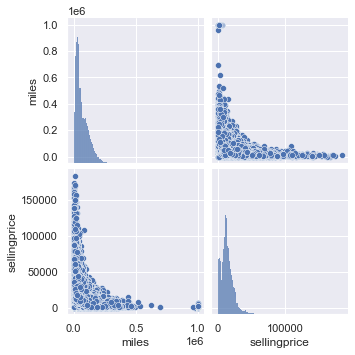

In [19]:
sns.pairplot(train_dataset);

## Correlation analysis

In [20]:
# Create correlation matrix for numerical variables
corr_matrix = train_dataset.corr()
corr_matrix

miles  sellingprice
miles         1.000000     -0.576428
sellingprice -0.576428      1.000000

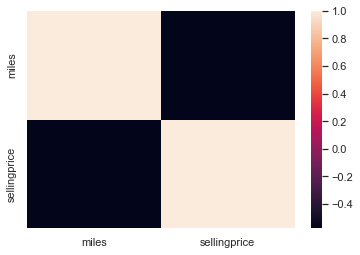

In [21]:
# Simple heatmap
heatmap = sns.heatmap(corr_matrix)

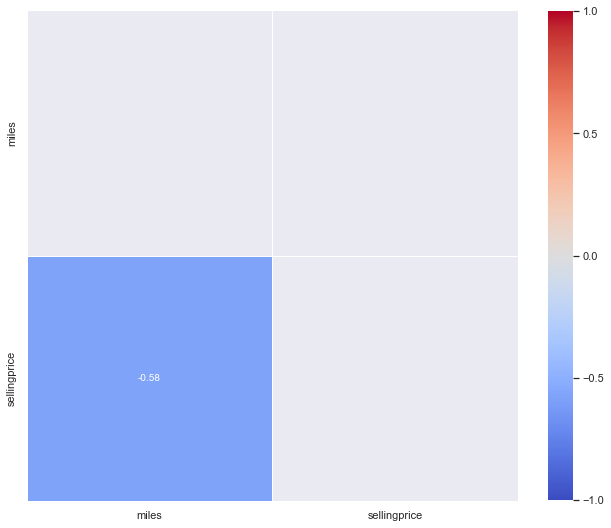

In [22]:
# Make a pretty heatmap

# Use a mask to plot only part of a matrix
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]= True

# Change size
plt.subplots(figsize=(11, 15))

# Build heatmap with additional options
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask, 
                      square = True, 
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .6,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10})

## Data preprocessing pipeline

In [23]:
# Modules
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [24]:
# for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

In [25]:
# for categorical features  
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

In [26]:
# Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
        ])

In [27]:
df.head()

year  brand                model   type state condition    miles  color  \
0  2015    kia              sorento    suv    ca       5.0  16639.0  white   
1  2015    kia              sorento    suv    ca       5.0   9393.0  white   
2  2014    bmw             3 series  sedan    ca       4.5   1331.0   gray   
3  2015  volvo                  s60  sedan    ca       4.1  14282.0  white   
4  2014    bmw  6 series gran coupe  sedan    ca       4.3   2641.0   gray   

  interior                                  seller  sellingprice  \
0    black                 kia motors america, inc         21500   
1    beige                 kia motors america, inc         21500   
2    black  financial services remarketing (lease)         30000   
3    black                 volvo na rep/world omni         27750   
4    black  financial services remarketing (lease)         67000   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

## Simple regression

In [28]:
# Select features for simple regression
features = ['miles']
X = df[features]

# Create response
y = df["sellingprice"]

In [29]:
# check feature
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533660 entries, 0 to 558810
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   miles   533660 non-null  float64
dtypes: float64(1)
memory usage: 24.3 MB


In [30]:
# check label
y

0         21500
1         21500
2         30000
3         27750
4         67000
          ...  
558806    33000
558807    30800
558808    34000
558809    11100
558810    26700
Name: sellingprice, Length: 533660, dtype: int64

In [31]:
# check for missing values
print("Missing values X:",X.isnull().any(axis=1).sum())

print("Missing values Y:",y.isnull().sum())

Missing values X: 0
Missing values Y: 0


## Data splitting

In [32]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [33]:
from sklearn.linear_model import LinearRegression

# Create pipeline with model
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
                        ])

In [34]:
# show pipeline
set_config(display="diagram")
# Fit model
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fef5dc6ead0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fef5dc6eb90>)])),
                ('lm', LinearRegression())])

In [35]:
# Obtain model coefficients
lm_pipe.named_steps['lm'].coef_

array([-5576.06320538])

## Evaluation with training data

In [36]:
X_train.head()

miles
56243    11527.0
374437   25436.0
90062   101963.0
142456   47619.0
171477  176019.0

In [37]:
y_pred = lm_pipe.predict(X_train)

In [38]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred)  

0.33186380016753614

In [39]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pred)

62598005.57227228

In [40]:
# RMSE
mean_squared_error(y_train, y_pred, squared=False)

7911.8901390421415

In [41]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, y_pred)

5490.50243705971

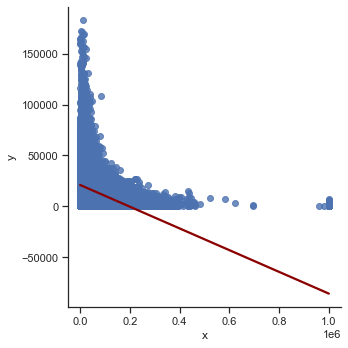

In [42]:
%matplotlib inline
import seaborn as sns 
sns.set_theme(style="ticks")

# Plot with Seaborn

# We first need to create a DataFrame
df_train = pd.DataFrame({'x': X_train['miles'], 'y':y_train})

sns.lmplot(x='x', y='y', data=df_train, line_kws={'color': 'darkred'}, ci=False);

In [43]:
import plotly.io as pio
import plotly.offline as py
import plotly.express as px

# Plot with Plotly Express
fig = px.scatter(x=X_train['miles'], y=y_train, opacity=0.65, 
                trendline='ols', trendline_color_override='darkred');

fig.show()

ModuleNotFoundError: No module named 'plotly'

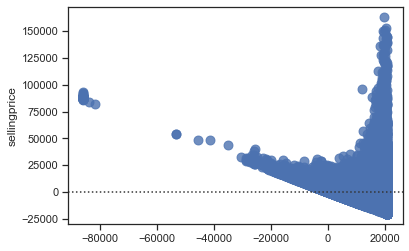

In [52]:
sns.residplot(x=y_pred, y=y_train, scatter_kws={"s": 80});

In [53]:
# wrongest predictions

# create dataframe
df_error = pd.DataFrame(
    { "y": y_train,
      "y_pred": y_pred,
      "error": y_pred - y_train
    })

# sort by error, select top 10 and get index
error_index = df_error.sort_values(by=['error']).nlargest(10, 'error').index

# show corresponding data observations
df.iloc[error_index]

year      brand             model      type state condition     miles  \
61616   2013      honda            accord     sedan    ga       4.1   13794.0   
531016  2014  chevrolet          traverse       suv    il       3.0   15881.0   
41444   2014     toyota             camry     sedan    co       4.3   12419.0   
543646  2013       audi                s6     sedan    nv       4.3   29013.0   
95291   1996       jeep    grand cherokee       suv    ca       2.0  126799.0   
332547  2012       ford  f-250 super duty  crew cab    tx       4.9   23339.0   
263467  2012      acura                tl     sedan    nj       4.3   16538.0   
40518   2004       ford          explorer       suv    fl       1.9  162284.0   
390097  2012     toyota        highlander       suv    wi       2.0   49557.0   
33169   2013    hyundai           elantra     sedan    az       3.9   37232.0   

         color interior                                seller  sellingprice  \
61616    black    black      ahfc/honda lease trust/hvt, inc.         18500   
531016    gray     gray                        gm remarketing         21500   
41444   silver    black    toyota motor sales usa inc/program         16800   
543646   white    black                     findlay chevrolet         51500   
95291      red     gray                          crest motors          1500   
332547   black    black            texas rv outlet superstore         44800   
263467    gray     gray  ahfc/honda lease trust/hvt, inc. eot         22900   
40518    green    beige                  east coast financial          1100   
390097   black     gray             toyota financial services         20500   
33169    brown      tan        enterprise veh exchange/rental         11500   

                                       saledate  
61616   Tue Dec 30 2014 13:00:00 GMT-0800 (PST)  
531016  Tue Jun 16 2015 03:00:00 GMT-0700 (PDT)  
41444   Tue Dec 23 2014 11:45:00 GMT-0800 (PST)  
543646  Fri Jun 12 2015 05:00:00 GMT-0700 (PDT)  
95291   Tue Jan 06 2015 12:30:00 GMT-0800 (PST)  
332547  Wed Feb 18 2015 02:20:00 GMT-0800 (PST)  
263467  Wed Feb 11 2015 01:30:00 GMT-0800 (PST)  
40518   Tue Jan 06 2015 01:15:00 GMT-0800 (PST)  
390097  Wed Mar 04 2015 02:00:00 GMT-0800 (PST)  
33169   Thu Dec 18 2014 11:30:00 GMT-0800 (PST)

## Evaluation with test data

In [54]:
y_pred = lm_pipe.predict(X_test)

In [55]:
print('MSE:', mean_squared_error(y_test, y_pred))

print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

MSE: 61969186.55675754
RMSE: 7872.050975238762


In [56]:
# Plot with Plotly Express
fig = px.scatter(x=X_test['miles'], y=y_test, opacity=0.65, 
                trendline='ols', trendline_color_override='darkred')

fig.show()

# Multiple Regression

In [57]:
# Select features for multiple regression
features= [
 'miles',
 'brand',
 'model',
 'type',
 'condition',
 'color'
  ]
X = df[features]

X.info()
print("Missing values:",X.isnull().any(axis = 1).sum())

# Create response
y = df["sellingprice"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533660 entries, 0 to 558810
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   miles      533660 non-null  float64 
 1   brand      533660 non-null  category
 2   model      533660 non-null  category
 3   type       533660 non-null  category
 4   condition  533660 non-null  category
 5   color      533660 non-null  category
dtypes: category(5), float64(1)
memory usage: 27.3 MB
Missing values: 0


In [59]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Create pipeline with model
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
                        ])

In [61]:
# show pipeline
set_config(display="diagram")
# Fit model
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7ed4ff2e20>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7ed4ff2cd0>)])),
                ('lm', LinearRegression())])

In [62]:
# Obtain model coefficients
lm_pipe.named_steps['lm'].coef_

array([-4.56717310e+03, -6.39295886e+03,  2.94670276e+04,  8.48026322e+03,
        5.89729378e+04, -1.15435924e+02, -1.26416008e+04, -5.92110550e+03,
       -7.42202280e+03, -3.21452622e+03, -7.36578267e+03,  7.71738420e+04,
       -1.21920093e+04,  9.35583502e+03, -1.03720055e+04, -4.05227398e+03,
       -1.54867148e+04, -9.89667083e+03, -9.95508601e+02, -1.17448291e+04,
        8.09648783e+03, -1.32342721e+04,  2.38158436e+03, -6.28096627e+03,
       -1.11571256e+04,  4.11928687e+04, -3.74985162e+03, -2.11085164e+03,
       -9.49655492e+03,  7.02780575e+03,  1.05294538e+04, -7.04093998e+03,
       -1.27141288e+02, -1.25046006e+04, -1.00391980e+04, -1.28647304e+04,
       -1.43069591e+04, -1.14900734e+04, -6.49756230e+03, -1.24944225e+04,
        1.24827952e+04, -7.18232380e+03,  6.31018526e+04, -1.15202002e+04,
       -1.34154688e+04, -1.15472009e+04, -1.06978044e+04, -8.40933469e+03,
       -1.40031426e+04,  1.87481977e+04, -8.13932114e+03, -1.10098947e+04,
       -9.87756582e+03, -

In [67]:
y_pred = lm_pipe.predict(X_test)

In [68]:
r2_score(y_test, y_pred)

0.7871510077904085

In [69]:
mean_squared_error(y_test, y_pred)

19820180.859093003

In [70]:
mean_squared_error(y_test, y_pred, squared=False)

4451.986170137212

In [71]:
mean_absolute_error(y_test, y_pred)

2881.345892972646

miles      brand       model       type condition  color
267897   39939.0     toyota       camry      sedan       4.8   gray
171482  116037.0     toyota     sequoia        suv       1.9  white
184480   49886.0     nissan      sentra      sedan       3.1   blue
236995   36389.0     toyota     corolla      sedan       3.6   gray
485805   16329.0      honda   ridgeline   crew cab       4.9   blue
...          ...        ...         ...        ...       ...    ...
284335   59103.0  chevrolet       cruze      sedan       2.5  white
190028   52200.0      honda        cr-v        suv       4.1  brown
373302   37095.0     nissan  versa note  hatchback       4.2   blue
196856   39302.0       jeep     patriot        suv       4.1  white
194769   77934.0     toyota       prius  hatchback       2.6    red

[106732 rows x 6 columns]